In [1]:
import os     #使用操作系統相關功能的模塊
import numpy as np          #Python進行科學計算的基礎包
import pandas as pd
from keras.utils import np_utils
import warnings
import facerecognition as fr

warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
fr.extractface(sample='sample0_face', number=200)

已擷取100張人臉圖片
已擷取200張人臉圖片
已擷取200張人臉樣本


In [3]:
fr.extractface(sample='sample1_face', number=200)

已擷取100張人臉圖片
已擷取200張人臉圖片
已擷取200張人臉樣本


In [4]:
fr.extractface(sample='sample2_face', number=200)

已擷取100張人臉圖片
已擷取200張人臉圖片
已擷取200張人臉樣本


In [5]:
# 寫入sample_name.txt

In [2]:
name_dict, number_of_samples=fr.getnamedict()

In [3]:
fr.train_validation_test_split()

sample0_train_validation: 160 	sample0_test: 40
sample1_train_validation: 160 	sample1_test: 40
sample2_train_validation: 160 	sample2_test: 40
sample0_train: 128 	sample0_validation: 32
sample1_train: 128 	sample1_validation: 32
sample2_train: 128 	sample2_validation: 32


# 資料預處理

In [4]:
target_size = 64

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255) 
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train/', target_size = (target_size, target_size), batch_size = 10, class_mode = 'categorical')
validation_set = validation_datagen.flow_from_directory('validation/', target_size = (target_size, target_size), batch_size = 10, class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('test/', target_size = (target_size, target_size), batch_size = 10, class_mode = 'categorical')

Found 384 images belonging to 3 classes.
Found 96 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


# 建立模型

In [6]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense

model = Sequential() # Initialising the CNN
model.add(Conv2D(32, (3, 3), input_shape = (target_size, target_size, 3), activation = 'relu')) # Convolution
model.add(MaxPooling2D(pool_size = (2, 2))) # Max Pooling
model.add(Conv2D(32, (3, 3), activation = 'relu')) # Convolution
model.add(MaxPooling2D(pool_size = (2, 2))) # Max Pooling
model.add(Flatten()) # Flattening
model.add(Dense(units = 128, activation = 'relu')) # Fully Connected
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = number_of_samples, activation = 'softmax'))
model.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
__________

# 訓練模型

In [7]:
from keras.models import load_model

try:
    model = load_model('SaveModel/facerecognition.hd5')
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型成功!繼續訓練模型


In [8]:
# https://keras-cn.readthedocs.io/en/latest/models/model/

In [9]:
history = model.fit_generator(training_set,
                              nb_epoch=20,
                              nb_val_samples=30,
                              steps_per_epoch = 30,
                              shuffle=True,
                              verbose = 1,
                              validation_data = validation_set)

Epoch 1/20
30/30 [==============================] - 2s 76ms/step - loss: 1.1040 - acc: 0.3184 - val_loss: 1.0728 - val_acc: 0.5104
Epoch 2/20
30/30 [==============================] - 2s 61ms/step - loss: 1.0398 - acc: 0.4600 - val_loss: 0.9110 - val_acc: 0.6771
Epoch 3/20
30/30 [==============================] - 2s 58ms/step - loss: 0.8080 - acc: 0.6717 - val_loss: 0.7026 - val_acc: 0.7500
Epoch 4/20
30/30 [==============================] - 2s 61ms/step - loss: 0.3508 - acc: 0.9000 - val_loss: 0.2782 - val_acc: 0.8750
Epoch 5/20
30/30 [==============================] - 2s 58ms/step - loss: 0.1890 - acc: 0.9400 - val_loss: 0.3729 - val_acc: 0.8750
Epoch 6/20
30/30 [==============================] - 2s 58ms/step - loss: 0.1166 - acc: 0.9600 - val_loss: 0.1629 - val_acc: 0.9583
Epoch 7/20
30/30 [==============================] - 2s 58ms/step - loss: 0.0401 - acc: 0.9933 - val_loss: 0.1006 - val_acc: 0.9792
Epoch 8/20
30/30 [==============================] - 2s 58ms/step - loss: 0.0325 - a

# 驗證曲線

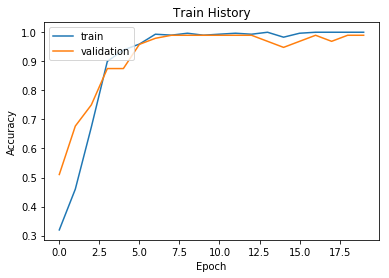

In [10]:
fr.show_acc_history(history=history)

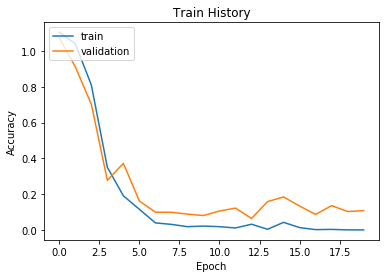

In [11]:
fr.show_loss_history(history=history)

# 模型預測

In [8]:
from keras.preprocessing import image

test_image = np.expand_dims(image.img_to_array(image.load_img(r'sample0_face\sample0_0.png', target_size= (64,64))), 0)/255

In [9]:
model.predict(test_image)[0]

array([  9.99978542e-01,   2.14580414e-05,   3.95610350e-10], dtype=float32)

In [10]:
model.predict_proba(test_image)[0]

array([  9.99978542e-01,   2.14580414e-05,   3.95610350e-10], dtype=float32)

In [11]:
model.predict_classes(test_image)[0]

0

In [12]:
model.predict(test_image)[0][model.predict_classes(test_image)[0]]

0.99997854

In [13]:
name_dict['sample'+str(model.predict_classes(test_image)[0])] 

'normal'

# 評估模型

In [14]:
testset_path = []   #testset_path為所有testset圖片路徑的list
for i in os.listdir('test'):
    for j in os.listdir('test/'+i):
        testset_path.append('test/'+i+'/'+j)  

x_test_image = []
for path in testset_path:
    x_test_image.append(image.img_to_array(image.load_img(path, target_size= (64,64))))
x_test_image = np.array(x_test_image)/225

y_test_label = test_set.classes
y_Test_OneHot = np_utils.to_categorical(y_test_label)

test = []
for x, y, z in zip(x_test_image, y_test_label, y_Test_OneHot):
    test.append([x, y, z])

x_test_image = []
y_test_label = []
y_Test_OneHot = []
for i in test:
    x_test_image.append(i[0])
    y_test_label.append(i[1])
    y_Test_OneHot.append(i[2])
x_test_image = np.array(x_test_image)
y_test_label = np.array(y_test_label)
y_Test_OneHot = np.array(y_Test_OneHot)

prediction = model.predict_classes(x_test_image)               #預測
scores = model.evaluate(x_test_image, y_Test_OneHot, verbose=0)  #評估
scores[1]

1.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


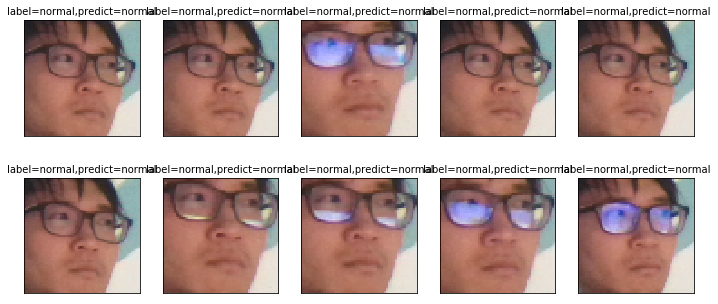

In [15]:
fr.plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=10)

# 混淆矩陣

In [16]:
y_test_label_names = np.ndarray((len(y_test_label),),dtype=object)
prediction_names = np.ndarray((len(prediction),),dtype=object)
for i, j, k in zip(y_test_label, prediction, range(len(y_test_label))):
    y_test_label_names[k] = name_dict['sample'+str(i)]
    prediction_names[k] = name_dict['sample'+str(j)]

In [17]:
pd.crosstab(y_test_label_names,prediction_names,rownames=['label'],colnames=['predict'])

predict,angry,normal,smile
label,,,
angry,40,0,0
normal,0,40,0
smile,0,0,40


# 儲存模型

In [26]:
if not os.path.exists('SaveModel'):
    os.mkdir('SaveModel')
# classifier.save_weights("SaveModel/face.h5")
model.save('SaveModel/facerecognition.hd5')
print("Saved model to disk")

Saved model to disk


# 人臉辨識

In [18]:
fr.facerecognition()